In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.externals import joblib 
import joblib

In [2]:
def take_log(df):
    
    # take log of data
    df['Adj Close'] = np.log(df['Adj Close'])
    
    return df

In [3]:
def get_deltas(df):
    vals = df['Adj Close']
    deltas = [vals[i+1] - vals[i] for i in range(len(vals)-1)]
    deltas.append(np.nan)
    df['Adj Close'] = deltas
    df.to_csv('../data/processed/deltas.csv')
    return df, deltas

In [4]:
def scale_data(df):
    scaler = MinMaxScaler(feature_range = (0, 1))
    df['Adj Close'] = scaler.fit_transform(df[['Adj Close']])
    # save scaler to use later when interpretting predictions
    joblib.dump(scaler, '../models/MinMaxScaler.save')
    return df

In [5]:
# raw data file path
RAW_DATA_FILE_PATH = "~/springboard1/capstone2/TimeSeries/data/raw/raw.csv"

# read csv data from
raw_df = pd.read_csv(RAW_DATA_FILE_PATH, index_col=0, parse_dates=['Date'])

# inspect data
raw_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1966-07-05,0.000000,0.273663,0.267490,0.269547,0.002970,388800
1966-07-06,0.000000,0.283951,0.267490,0.283951,0.003128,687200
1966-07-07,0.000000,0.291152,0.271605,0.273663,0.003015,1853600
1966-07-08,0.000000,0.276749,0.267490,0.276749,0.003049,1238400
1966-07-11,0.000000,0.283951,0.272634,0.275720,0.003038,655200
...,...,...,...,...,...,...
2020-03-27,162.779999,169.740005,159.220001,164.009995,164.009995,6441400
2020-03-30,164.919998,170.309998,163.570007,168.130005,168.130005,5621700
2020-03-31,166.839996,169.509995,165.000000,165.350006,165.350006,4519900


In [6]:
# slice Adj Close column
adj_close_df = raw_df.iloc[:,4:5]
adj_close_df

,Adj Close
Date,
1966-07-05,0.002970
1966-07-06,0.003128
1966-07-07,0.003015
1966-07-08,0.003049
1966-07-11,0.003038
...,...
2020-03-27,164.009995
2020-03-30,168.130005
2020-03-31,165.350006


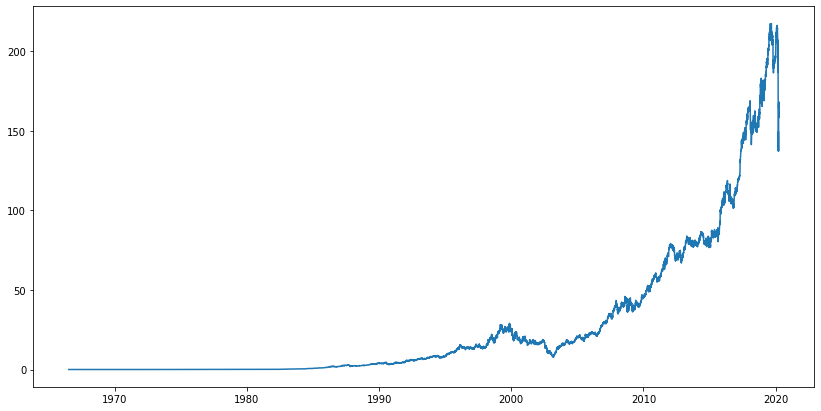

In [7]:
# plot adjusted close
_ = plt.figure(figsize=(14,7))
_ = plt.plot(adj_close_df)
plt.show()

In [8]:
# take the log change if the price
#log_scaled_adj_close, deltas = get_deltas(adj_close_df)
#log_scaled_adj_close = take_log(log_scaled_adj_close)
log_scaled_adj_close = take_log(adj_close_df)
log_scaled_adj_close, deltas = get_deltas(log_scaled_adj_close)
#log_scaled_adj_close = scale_data(log_scaled_adj_close)

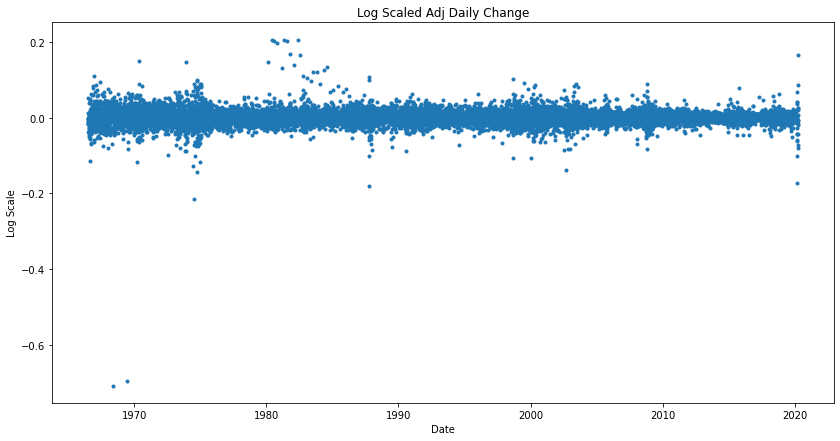

In [9]:
# plot log scaled adjusted close
_ = plt.figure(figsize=(14,7))
_ = plt.plot(log_scaled_adj_close, linestyle='None', marker='.')
_ = plt.title('Log Scaled Adj Daily Change')
_ = plt.xlabel('Date')
_ = plt.ylabel('Log Scale')
plt.show()
    

/home/alhalarewicz/anaconda3/envs/TimeSeries/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/alhalarewicz/anaconda3/envs/TimeSeries/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


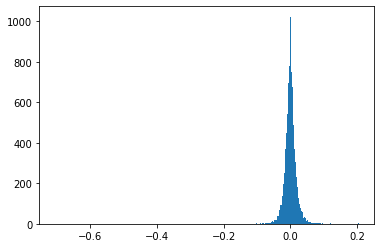

In [10]:
_ = plt.hist(deltas, bins = 500)

In [11]:
# see 20:30 for structuring time series data for 5 trailing days

def create_previous_days(df, col_name):
    
    """
    Create columns containing the stock price for each of the previous five days.
    
    Params
    ------
    DataFrame containing stock prices for consecutive days
    
    Return
    ------
    A times series formatted DataFrame
    """
    
    back_1 = np.nan
    back_2 = np.nan
    back_3 = np.nan
    back_4 = np.nan
    back_5 = np.nan
    
    back_1_col = []
    back_2_col = []
    back_3_col = []
    back_4_col = []
    back_5_col = []
    
    for today in df[col_name]:
        
        # append previous values
        back_1_col.append(back_1)
        back_2_col.append(back_2)
        back_3_col.append(back_3)
        back_4_col.append(back_4)
        back_5_col.append(back_5)
        
        # set values for next day to step forward
        back_5 = back_4
        back_4 = back_3
        back_3 = back_2
        back_2 = back_1
        back_1 = today
        
    # append columns to time_series dataframe
    df['back_5'] = back_5_col
    df['back_4'] = back_4_col
    df['back_3'] = back_3_col
    df['back_2'] = back_2_col
    df['back_1'] = back_1_col

    # order columns chronologically
    df = df[['back_5', 'back_4', 'back_3', 'back_2', 'back_1', col_name]]
        
    return df
    
        
        
previous_df = create_previous_days(log_scaled_adj_close, 'Adj Close')
previous_df

,back_5,back_4,back_3,back_2,back_1,Adj Close
Date,,,,,,
1966-07-05,NaN,NaN,NaN,NaN,NaN,0.052056
1966-07-06,NaN,NaN,NaN,NaN,0.052056,-0.036905
1966-07-07,NaN,NaN,NaN,0.052056,-0.036905,0.011215
1966-07-08,NaN,NaN,0.052056,-0.036905,0.011215,-0.003724
1966-07-11,NaN,0.052056,-0.036905,0.011215,-0.003724,-0.015037
...,...,...,...,...,...,...
2020-03-27,-0.079807,0.166577,0.006340,0.026460,-0.020160,0.024810
2020-03-30,0.166577,0.006340,0.026460,-0.020160,0.024810,-0.016673
2020-03-31,0.006340,0.026460,-0.020160,0.024810,-0.016673,-0.044394


In [12]:
def create_future_days(df, col_name):
    
    df = df.sort_index(ascending=False)
    
    next_1 = np.nan
    next_2 = np.nan
    next_3 = np.nan
    next_4 = np.nan
    next_5 = np.nan
    
    next_1_col = []
    next_2_col = []
    next_3_col = []
    next_4_col = []
    next_5_col = []
    
    for today in df[col_name]:
        
        next_1_col.append(next_1)
        next_2_col.append(next_2)
        next_3_col.append(next_3)
        next_4_col.append(next_4)
        next_5_col.append(next_5)
        
        next_5 = next_4
        next_4 = next_3
        next_3 = next_2
        next_2 = next_1
        next_1 = today
        
    df['next_1'] = next_1_col
    df['next_2'] = next_2_col
    df['next_3'] = next_3_col
    df['next_4'] = next_4_col
    df['next_5'] = next_5_col
    
    df = df.sort_index(ascending=True)
    
    return df

future_df = create_future_days(previous_df, 'Adj Close')
future_df

,back_5,back_4,back_3,back_2,back_1,Adj Close,next_1,next_2,next_3,next_4,next_5
Date,,,,,,,,,,,
1966-07-05,NaN,NaN,NaN,NaN,NaN,0.052056,-0.036905,0.011215,-0.003724,-0.015037,-0.003795
1966-07-06,NaN,NaN,NaN,NaN,0.052056,-0.036905,0.011215,-0.003724,-0.015037,-0.003795,-0.011473
1966-07-07,NaN,NaN,NaN,0.052056,-0.036905,0.011215,-0.003724,-0.015037,-0.003795,-0.011473,-0.015504
1966-07-08,NaN,NaN,0.052056,-0.036905,0.011215,-0.003724,-0.015037,-0.003795,-0.011473,-0.015504,0.000000
1966-07-11,NaN,0.052056,-0.036905,0.011215,-0.003724,-0.015037,-0.003795,-0.011473,-0.015504,0.000000,-0.015748
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-27,-0.079807,0.166577,0.006340,0.026460,-0.020160,0.024810,-0.016673,-0.044394,0.020835,NaN,NaN
2020-03-30,0.166577,0.006340,0.026460,-0.020160,0.024810,-0.016673,-0.044394,0.020835,NaN,NaN,NaN
2020-03-31,0.006340,0.026460,-0.020160,0.024810,-0.016673,-0.044394,0.020835,NaN,NaN,NaN,NaN


In [13]:
def create_time_series(df, col_name='Adj Close'):
    df = create_previous_days(df, col_name)
    #df = create_future_days(df, col_name)
    return df

time_series_df = create_time_series(log_scaled_adj_close, 'Adj Close')
time_series_df

,back_5,back_4,back_3,back_2,back_1,Adj Close
Date,,,,,,
1966-07-05,NaN,NaN,NaN,NaN,NaN,0.052056
1966-07-06,NaN,NaN,NaN,NaN,0.052056,-0.036905
1966-07-07,NaN,NaN,NaN,0.052056,-0.036905,0.011215
1966-07-08,NaN,NaN,0.052056,-0.036905,0.011215,-0.003724
1966-07-11,NaN,0.052056,-0.036905,0.011215,-0.003724,-0.015037
...,...,...,...,...,...,...
2020-03-27,-0.079807,0.166577,0.006340,0.026460,-0.020160,0.024810
2020-03-30,0.166577,0.006340,0.026460,-0.020160,0.024810,-0.016673
2020-03-31,0.006340,0.026460,-0.020160,0.024810,-0.016673,-0.044394


In [14]:
time_series_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13529 entries, 1966-07-05 to 2020-04-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   back_5     13524 non-null  float64
 1   back_4     13525 non-null  float64
 2   back_3     13526 non-null  float64
 3   back_2     13527 non-null  float64
 4   back_1     13528 non-null  float64
 5   Adj Close  13528 non-null  float64
dtypes: float64(6)
memory usage: 1.3 MB


In [15]:
time_series_df.to_csv('../data/interim/time_series.csv')